# 데이터셋 API
- 데이터 입력 파이프라인을 위한 패키지
- tf.data 패키지에서 제공
- tf.data.Dataset 추상클래스에서 상속된 여러가지 클래스 객체를 사용 또는 만들어 쓴다.

## 데이터 입력 파이프라인이란
**모델에 공급**되는 데이터에 대한 전처리 작업과 공급을 담당한다.    
- 이미지 데이터의 경우
    - 분산 파일시스템으로 부터 이미지를 모으는 작업, 
    - 이미지에 노이즈를 주거나 변형하는 작업, 
    - 배치 학습을 위해 무작위로 데이터를 선택하여 배치데이터를 만드는 작업
- 텍스트 데이터 경우
    - 원문을 토큰화하는 작업
    - 임베딩하는 작업
    - 길이가 다른 데이터를 패딩하여 합치는 작업 


## 데이터셋 API 사용 세단계
1. 데이터셋 생성
    - from_tensor_slices(), from_generator() 클래스 메소드, tf.data.TFRecordDataset 클래스를 사용해 메모리나 파일에 있는 데이터를 데이터소스로 만든다.
    - from_tensor_slices(): 리스트 넘파이배열, 텐서플로 자료형에서 데이터를 생성한다.
2. 데이터셋 변형: map(), filter(), batch() 등 메소드를 이용해 데이터 소스를 변형한다.
3. for 반복문에서 iterate를 통해 데이터셋 사용

## Dataset의 주요 메소드
- map(함수) : dataset의 각 원소들을 함수로 처리한다.
- shuffle(크기): dataset의 원소들의 순서를 섞는다. 크기는 섞는 공간의 크기로  **데이터보다 크거나 같으면** 완전셔플, **적으면 일부만 가져와서 섞어** 완전셔플이 안된다.=>데이터가 너무너무 많으면 적게 주기도 한다.)
- batch(size) : 반복시 제공할 데이터 수. 지정한 batch size만큼 data를 꺼내준다.

In [75]:
import tensorflow as tf
import numpy as np

In [76]:
arr = np.arange(9) # 0 ~ 8: 9

In [77]:
# 메모리에 ndarray로 저장된 데이터를 이용해 Dataset객체 작성
dataset = tf.data.Dataset.from_tensor_slices(arr)
type(dataset)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [78]:
# 각각의 워소를 변환작업을 Dataset 추가. - Dataset.map(변환함수)
dataset = dataset.map(lambda x:x**2)
type(dataset)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [79]:
# dataset = dataset.filter(lambda x: x%2 == 0)

In [80]:
dataset = dataset.shuffle(9) # 값들을 섞는 작업

In [81]:
dataset = dataset.batch(3) # 한번에 지정한 개수만큼 제공

In [82]:
# Dataset에서 제공되는 값들을 조회
for a in dataset:
    print(a)

tf.Tensor([ 1 36 49], shape=(3,), dtype=int32)
tf.Tensor([64  4  9], shape=(3,), dtype=int32)
tf.Tensor([ 0 25 16], shape=(3,), dtype=int32)


In [83]:
x = np.arange(10)
y = np.arange(10, 20)
x.shape, y.shape

((10,), (10,))

In [84]:
ds = tf.data.Dataset.from_tensor_slices((x, y))

In [85]:
for a in ds:
    print(a)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=10>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=11>)
(<tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=12>)
(<tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=13>)
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=14>)
(<tf.Tensor: shape=(), dtype=int32, numpy=5>, <tf.Tensor: shape=(), dtype=int32, numpy=15>)
(<tf.Tensor: shape=(), dtype=int32, numpy=6>, <tf.Tensor: shape=(), dtype=int32, numpy=16>)
(<tf.Tensor: shape=(), dtype=int32, numpy=7>, <tf.Tensor: shape=(), dtype=int32, numpy=17>)
(<tf.Tensor: shape=(), dtype=int32, numpy=8>, <tf.Tensor: shape=(), dtype=int32, numpy=18>)
(<tf.Tensor: shape=(), dtype=int32, numpy=9>, <tf.Tensor: shape=(), dtype=int32, numpy=19>)


In [86]:
ds2 = ds.map(lambda x, y: (x**2, y**3)) # x:2제곱, y:3제곱

In [87]:
for a in ds2:
    print(a)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=1000>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=1331>)
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=1728>)
(<tf.Tensor: shape=(), dtype=int32, numpy=9>, <tf.Tensor: shape=(), dtype=int32, numpy=2197>)
(<tf.Tensor: shape=(), dtype=int32, numpy=16>, <tf.Tensor: shape=(), dtype=int32, numpy=2744>)
(<tf.Tensor: shape=(), dtype=int32, numpy=25>, <tf.Tensor: shape=(), dtype=int32, numpy=3375>)
(<tf.Tensor: shape=(), dtype=int32, numpy=36>, <tf.Tensor: shape=(), dtype=int32, numpy=4096>)
(<tf.Tensor: shape=(), dtype=int32, numpy=49>, <tf.Tensor: shape=(), dtype=int32, numpy=4913>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=5832>)
(<tf.Tensor: shape=(), dtype=int32, numpy=81>, <tf.Tensor: shape=(), dtype=int32, numpy=6859>)


In [88]:
ds3 = ds2.shuffle(10)

In [89]:
for a in ds3:
    print(a)

(<tf.Tensor: shape=(), dtype=int32, numpy=9>, <tf.Tensor: shape=(), dtype=int32, numpy=2197>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=5832>)
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=1728>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=1331>)
(<tf.Tensor: shape=(), dtype=int32, numpy=36>, <tf.Tensor: shape=(), dtype=int32, numpy=4096>)
(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=1000>)
(<tf.Tensor: shape=(), dtype=int32, numpy=81>, <tf.Tensor: shape=(), dtype=int32, numpy=6859>)
(<tf.Tensor: shape=(), dtype=int32, numpy=25>, <tf.Tensor: shape=(), dtype=int32, numpy=3375>)
(<tf.Tensor: shape=(), dtype=int32, numpy=49>, <tf.Tensor: shape=(), dtype=int32, numpy=4913>)
(<tf.Tensor: shape=(), dtype=int32, numpy=16>, <tf.Tensor: shape=(), dtype=int32, numpy=2744>)


In [90]:
ds4 = ds2.batch(4)

In [91]:
for a in ds4:
    print(a)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)


In [92]:
for a in ds4.repeat(3): # dataset.repeat(count) count횟수만큼 반복, count생략시 무한제공
    print(a)    

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,)

In [94]:
dataset = tf.data.Dataset.from_tensor_slices((x, y))\
.map(lambda x, y: (x**2, y**3))\
.shuffle(10)\
.batch(4)\
.repeat(3)

In [95]:
for a in dataset:
    print(a)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9,  0, 81,  4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 1000, 6859, 1728])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 16, 49, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 2744, 4913, 5832])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 1, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1331, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0, 25,  4, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 3375, 1728, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81, 64, 16, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 5832, 2744, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([9, 1])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2197, 1331])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 16, 36, 64])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 2744, 4096, 5832])>)
(<tf.Tensor: 

# 1. 회귀 - Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율

예측해야하는 것
- MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [96]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [97]:
# random seed
np.random.seed(1)
tf.random.set_seed(1)

In [98]:
# 데이터셋 로딩
(X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data()
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [99]:
y_train[:5] # 회귀(Regression)

array([15.2, 42.3, 50. , 21.1, 17.7])

In [100]:
X_train[1]

array([2.1770e-02, 8.2500e+01, 2.0300e+00, 0.0000e+00, 4.1500e-01,
       7.6100e+00, 1.5700e+01, 6.2700e+00, 2.0000e+00, 3.4800e+02,
       1.4700e+01, 3.9538e+02, 3.1100e+00])

In [101]:
# 하이퍼파라미터 값들을 설정
LEARNING_RATE = 0.001 # 학습률
N_EPOCHS = 200 # 에폭 횟수
N_BATCHS = 32 # # batch_size. 32개 데이터셋마다 가중치 업데이트

N_TRAIN = X_train.shape[0] # train set의 개수
N_TEST = X_test.shape[0] # test set의 개수
N_FEATURES = X_train.shape[1] # input data의 feature(컬럼) 개수

In [102]:
# Dataset 생성
# drop_remainder=True: 마지막에 batch size보다 제공할 데이터가 적으면 학습시 버림
# repeat(): epoch을 반복할 때마다 계속 데이터를 제공하게 하기 위해
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
.shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True).repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

In [103]:
# 모델 생성
def create_model():
    model = keras.Sequential()
    # 입력 Layer를 따로 정의.
    # 첫번째 Layer를 만들 때 input_shape(입력데이터 1개의 형태)를 지정시 입력 Layer층이 자동 생성
    model.add(keras.layers.Dense(units=16, activation='relu', input_shape=(N_FEATURES,)))
    model.add(keras.layers.Dense(units=8, activation='relu'))
    # 출력 Layer
    model.add(keras.layers.Dense(units=1)) # 회귀의 출력층: units수는 1, activation 함수 사용
    
    # 모델 컴파일
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), # optimizer의 하이퍼파라미터를 기본값으로 쓸 경우 문자열로 "adam"으로 선언.
                 loss="mse") # 회귀의 Loss 함수: mse
    return model

In [104]:
model = create_model()

In [105]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [106]:
# 1 step: 한번 가중치를 업데이트. batch size
# 1 epoch: 전체 train 데이터를 한번 학습
steps_per_epoch = N_TRAIN // N_BATCHS # 학습데이터개수 // 배치수
validation_steps = int(np.ceil(N_TEST / N_BATCHS))

In [107]:
history = model.fit(train_dataset, # train dataset (X_train, y_train)
         epochs=N_EPOCHS,
         steps_per_epoch=steps_per_epoch, # 1 에폭당 step 수
          validation_data=val_dataset, # 검증 Dataset 지정
          validation_steps=validation_steps
         )

Epoch 1/200
12/12 [==============================] - 0s 15ms/step - loss: 430.2726 - val_loss: 196.5993
Epoch 2/200
12/12 [==============================] - 0s 4ms/step - loss: 165.9305 - val_loss: 84.1738
Epoch 3/200
12/12 [==============================] - 0s 4ms/step - loss: 82.1791 - val_loss: 68.0693
Epoch 4/200
12/12 [==============================] - 0s 4ms/step - loss: 70.2942 - val_loss: 67.3288
Epoch 5/200
12/12 [==============================] - 0s 4ms/step - loss: 80.2150 - val_loss: 65.4812
Epoch 6/200
12/12 [==============================] - 0s 3ms/step - loss: 68.2904 - val_loss: 68.2325
Epoch 7/200
12/12 [==============================] - 0s 4ms/step - loss: 71.6076 - val_loss: 65.8452
Epoch 8/200
12/12 [==============================] - 0s 3ms/step - loss: 69.0693 - val_loss: 63.7502
Epoch 9/200
12/12 [==============================] - 0s 4ms/step - loss: 71.0003 - val_loss: 63.4894
Epoch 10/200
12/12 [==============================] - 0s 3ms/step - loss: 54.7305 - val

12/12 [==============================] - 0s 4ms/step - loss: 37.7517 - val_loss: 42.4188
Epoch 82/200
12/12 [==============================] - 0s 4ms/step - loss: 47.1956 - val_loss: 47.8275
Epoch 83/200
12/12 [==============================] - 0s 3ms/step - loss: 37.1892 - val_loss: 41.5727
Epoch 84/200
12/12 [==============================] - 0s 3ms/step - loss: 43.7097 - val_loss: 42.4808
Epoch 85/200
12/12 [==============================] - 0s 3ms/step - loss: 42.0608 - val_loss: 41.7492
Epoch 86/200
12/12 [==============================] - 0s 3ms/step - loss: 38.9787 - val_loss: 41.1111
Epoch 87/200
12/12 [==============================] - 0s 3ms/step - loss: 46.4701 - val_loss: 43.6833
Epoch 88/200
12/12 [==============================] - 0s 3ms/step - loss: 39.7330 - val_loss: 42.6491
Epoch 89/200
12/12 [==============================] - 0s 4ms/step - loss: 45.6235 - val_loss: 41.8378
Epoch 90/200
12/12 [==============================] - 0s 4ms/step - loss: 39.0218 - val_loss: 4

Epoch 161/200
12/12 [==============================] - 0s 4ms/step - loss: 33.9621 - val_loss: 36.5446
Epoch 162/200
12/12 [==============================] - 0s 3ms/step - loss: 34.3464 - val_loss: 35.7358
Epoch 163/200
12/12 [==============================] - 0s 4ms/step - loss: 29.5864 - val_loss: 37.3171
Epoch 164/200
12/12 [==============================] - 0s 3ms/step - loss: 31.3522 - val_loss: 35.9783
Epoch 165/200
12/12 [==============================] - 0s 4ms/step - loss: 34.5702 - val_loss: 35.8389
Epoch 166/200
12/12 [==============================] - 0s 3ms/step - loss: 32.1502 - val_loss: 35.9802
Epoch 167/200
12/12 [==============================] - 0s 3ms/step - loss: 37.1661 - val_loss: 36.2338
Epoch 168/200
12/12 [==============================] - 0s 4ms/step - loss: 32.7854 - val_loss: 36.5858
Epoch 169/200
12/12 [==============================] - 0s 4ms/step - loss: 38.6771 - val_loss: 35.3810
Epoch 170/200
12/12 [==============================] - 0s 4ms/step - loss

In [112]:
type(history)

tensorflow.python.keras.callbacks.History

In [108]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [109]:
history.history

{'loss': [402.1755676269531,
  151.89991760253906,
  81.30701446533203,
  77.13301086425781,
  73.28703308105469,
  73.65941619873047,
  68.5960464477539,
  68.1734619140625,
  64.48908233642578,
  64.80988311767578,
  65.43766021728516,
  62.97397232055664,
  63.70985794067383,
  65.03363800048828,
  63.96836853027344,
  62.03939437866211,
  62.40961837768555,
  59.52606201171875,
  61.34281921386719,
  58.38675308227539,
  59.82392501831055,
  60.4442024230957,
  57.6439323425293,
  58.55879211425781,
  55.6146125793457,
  55.175479888916016,
  56.72218322753906,
  55.242645263671875,
  56.00655746459961,
  55.08198928833008,
  54.4144172668457,
  53.56959533691406,
  51.9430046081543,
  50.85279846191406,
  52.05717468261719,
  56.36387634277344,
  58.0538330078125,
  55.846920013427734,
  50.7780876159668,
  50.52508544921875,
  50.23122024536133,
  51.10897445678711,
  47.11061477661133,
  46.91719055175781,
  49.16594314575195,
  49.58452224731445,
  49.95680236816406,
  47.27009

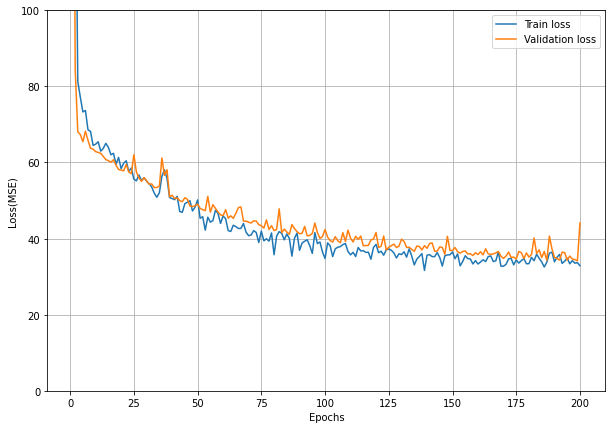

In [111]:
# epoch당 loss와 val_loss 변화에 대해 선그래프 작성
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

plt.plot(range(1, N_EPOCHS+1), history.history['loss'], label='Train loss')
plt.plot(range(1, N_EPOCHS+1), history.history['val_loss'], label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss(MSE)')
plt.ylim(0, 100)
plt.legend()
plt.grid(True)
plt.show()

## 2. Classification

### Fashion MNIST(MNIST) Dataset

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

패션 MNIST와 손글씨 MNIST는  비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 하며 코드를 테스트하고 디버깅하는 용도로 좋다.

이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 아래 표는 이미지에 있는 의류의 **클래스**(class)를 나낸다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']